In [1]:
import toolkit

### First, we gather the dataset. This is a history of Java static code metrics and change metrics for our project.

In [2]:
# Used to indicate where the data should be gathered and stored

rootDirectory = '../dataSets/okhttpStudy/'
# Call gatherTimeMetrics and measure Java, Indent and Change metrics 
# on .java files from the git project's repository


# Call gatherTimeMetrics and measure Java and change metrics 
# on .java files from the git project's repository
metricsDataMaven = toolkit.data.gatherTimeMetrics(rootDirectory, 'https://github.com/square/okhttp.git', rootDirectory+'okhttp/', '*/*.java *.java', ['java'], skipEvery=50)

In [3]:
metricsDataMaven['data']

,entity,age-months,n-authors,n-revs,added,deleted,fractal-value,soc,netchurn,cbo,...,assignmentsQty,mathOperationsQty,variablesQty,maxNestedBlocks,anonymousClassesQty,subClassesQty,lambdasQty,uniqueWordsQty,modifiers,time
0,okhttp/src/test/java/okhttp3/internal/http2/Ht...,0,2,6,90,61,0.28,8,29,34,...,262,12,261,3,6,-2,0,391,24,2019-07-25
1,okhttp-sse/src/test/java/okhttp3/internal/sse/...,0,2,2,3,8,0.50,12,-5,12,...,12,3,10,0,0,0,0,45,17,2019-07-25
2,okhttp/src/test/java/okhttp3/internal/http2/Ht...,0,2,6,128,6,0.44,14,122,86,...,231,7,214,8,22,-9,1,438,16,2019-07-25
3,okhttp/src/test/java/okhttp3/CacheTest.java,1,3,4,43,9,0.63,7,34,37,...,295,136,282,1,6,-4,3,561,14,2019-07-25
4,okhttp/src/test/java/okhttp3/ConnectionCoalesc...,1,2,2,105,7,0.50,6,98,20,...,34,0,32,1,2,-1,3,182,16,2019-07-25
5,okhttp/src/test/java/okhttp3/EventListenerTest...,1,3,4,8,18,0.63,28,-10,68,...,154,11,141,5,12,-5,3,239,13,2019-07-25
6,okhttp/src/test/java/okhttp3/internal/ws/WebSo...,1,2,4,17,17,0.50,24,0,40,...,89,8,82,2,14,-7,3,248,10,2019-07-25
7,okhttp/src/test/java/okhttp3/CallTest.java,1,4,10,95,19,0.64,32,76,118,...,435,35,377,10,52,-25,8,731,1,2019-07-25
8,okhttp/src/test/java/okhttp3/DispatcherTest.java,1,2,2,5,6,0.50,16,-1,16,...,36,0,36,2,0,0,4,120,17,2019-07-25
9,okhttp/src/test/java/okhttp3/internal/connecti...,1,3,6,49,22,0.50,8,27,13,...,28,0,28,1,0,0,0,91,17,2019-07-25


### How many times did we sample from?

In [4]:
print metricsDataMaven['times']

47


### How many features and samples are in our dataset?

In [5]:
print metricsDataMaven['data'].shape

(2404, 50)


### How many unique source files were measured?

In [6]:
print metricsDataMaven['data']['entity'].nunique()

843


# Change Metrics
### Let's see what affects the net churn of files 
### Which metrics have the most impact on churn?

In [7]:
# We split the data into 5 equally-sized groups, 
# then perform cross-validation while gradually adding these groups to the training set

# i.e. the train-test splits are with groups of size:
# 1-4, 2-3, 3-2, 4-1

# We omit visualization of decision trees to save space,
# but they can be shown with visualize=True as above
folds = 5

from sklearn.tree import DecisionTreeRegressor
modelInstance = DecisionTreeRegressor(max_leaf_nodes=16)
modelSimpler = DecisionTreeRegressor(max_leaf_nodes=8)
churnModelMoreFolds = toolkit.refinement.makeAndUpdateModel(rootDirectory, metricsDataMaven['data'], folds, 'netchurn', modelInstance, modelSimpler, scoreOnly=False) 

Response variable was netchurn
Model.score: 0.637454
                 name  importance
4             deleted    0.624535
39  mathOperationsQty    0.240839
Model.score: 0.777115
      name  importance
4  deleted    0.635034
3    added    0.204069
Model.score: -3.471828
      name  importance
4  deleted    0.632701
Model.score: 0.608597
      name  importance
4  deleted    0.579622
3    added    0.305019
Model.score: 0.528168
      name  importance
1  deleted    0.807495
Model.score: 0.562215
      name  importance
1  deleted    0.747642
Model.score: 0.347597
      name  importance
1  deleted    0.737669
0    added    0.262331
Model.score: 0.391334
      name  importance
1  deleted    0.594465
0    added    0.309009


/opt/conda/envs/python2/lib/python2.7/site-packages/sklearn/utils/__init__.py:93: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):


In [8]:
folds = metricsDataMaven['times'] # This is an attribute of the measured data set: the number of time points measured
churnModelMoreFolds = toolkit.refinement.makeAndUpdateModel(rootDirectory, metricsDataMaven['data'], folds, 'netchurn', modelInstance, scoreOnly=False) 

Response variable was netchurn
Model.score: -0.388889
              name  importance
45  uniqueWordsQty        0.32
Model.score: 0.821747
      name  importance
4  deleted    0.535828
3    added    0.260062
Model.score: 0.688150
      name  importance
4  deleted    0.630941
3    added    0.206903
Model.score: 0.322493
      name  importance
4  deleted    0.518458
3    added    0.313540
Model.score: 0.409541
      name  importance
3    added    0.433840
4  deleted    0.281231
Model.score: 0.107143
      name  importance
3    added    0.506656
4  deleted    0.262612
Model.score: -0.096491
      name  importance
3    added    0.504844
4  deleted    0.240271
Model.score: 0.082657
      name  importance
3    added    0.514366
4  deleted    0.242117
Model.score: 0.235514
      name  importance
3    added    0.387222
4  deleted    0.372106
Model.score: -0.131561
      name  importance
3    added    0.567407
4  deleted    0.307207
Model.score: -0.747202
      name  importance
3    added    0.5

### Results of this step are omitted for printing. However, the large cross-validation can be run to see them.

### The individual data sets used for training and testing are quite small and imbalanced.

### Many of the same relationships still show up.

### Why is 'deleted' more important factor than 'added'? 

In [9]:
print "Mean", metricsDataMaven['data']['netchurn'].mean()
print "Variance", metricsDataMaven['data']['netchurn'].var()
print "Standard deviation", metricsDataMaven['data']['netchurn'].std()
print "Max", metricsDataMaven['data']['netchurn'].max()
print "Min", metricsDataMaven['data']['netchurn'].min()

Mean -5.468386023294509
Variance 12577.661505342396
Standard deviation 112.15017389795878
Max 996
Min -2190


### This codebase is shrinking slightly (more deleted than added) This may be caused by refactoring

### Some files must experience more churn than others. We know from some of the motivating literature that defects can be correlated with large pre-release churn.

### Let's make some categories of binned churn data and classify them 

In [10]:
churnBinnedCategories = ['churnLow','churnMediumLow','churnMediumHigh','churnHigh']
dataSetUpdated = toolkit.utilities.addBinnedResponseCategory(metricsDataMaven['data'], 'netchurn', churnBinnedCategories)

In [23]:
from sklearn.tree import DecisionTreeClassifier
modelInstance = DecisionTreeClassifier(max_leaf_nodes=8, criterion='entropy')
churnModelCategories = toolkit.refinement.makeAndUpdateModel(rootDirectory, dataSetUpdated, 2, churnBinnedCategories, modelInstance, modelSimpler, visualize=False, scoreOnly=False) 


Response variable was ['churnLow', 'churnMediumLow', 'churnMediumHigh', 'churnHigh']
Model.score: 0.987510
accuracy_score: 0.987510
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         0
          1       0.38      1.00      0.55         3
          2       1.00      0.99      0.99      1186
          3       0.55      0.50      0.52        12

avg / total       0.99      0.99      0.99      1201

roc_auc_score cannot be computed for this test set
      name  importance
4  deleted    0.477736
3    added    0.396773
Model.score: 0.178418


ValueError: Classification metrics can't handle a mix of multilabel-indicator and continuous-multioutput targets

### 

In [12]:
folds = 5
churnModelCategories = toolkit.refinement.makeAndUpdateModel(rootDirectory, dataSetUpdated, folds, churnBinnedCategories, modelInstance, modelSimpler, visualize=False, scoreOnly=False) 


Response variable was ['churnLow', 'churnMediumLow', 'churnMediumHigh', 'churnHigh']
Model.score: 0.977035
accuracy_score: 0.977035
             precision    recall  f1-score   support

          0       0.33      1.00      0.50         1
          1       0.00      0.00      0.00         2
          2       0.98      1.00      0.99       466
          3       1.00      0.10      0.18        10

avg / total       0.98      0.98      0.97       479

roc_auc_score: 0.675439
      name  importance
4  deleted     0.65455
Model.score: 0.972860
accuracy_score: 0.972860
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         0
          1       0.33      1.00      0.50         1
          2       1.00      0.97      0.99       474
          3       0.27      1.00      0.42         4

avg / total       0.99      0.97      0.98       479

roc_auc_score cannot be computed for this test set
      name  importance
4  deleted    0.474622
3    added  

ValueError: Classification metrics can't handle a mix of multilabel-indicator and continuous-multioutput targets

### Let's look at this from another point of view. What characterises the files which have the most lines added?

In [32]:
addedModel = toolkit.refinement.makeAndUpdateModel(rootDirectory, metricsDataMaven['data'], 2, 'added', modelInstance, modelSimpler, visualize=False, scoreOnly=False) 


Response variable was added
Model.score: 0.945878
accuracy_score: 0.945878
             precision    recall  f1-score   support

          0       0.95      0.98      0.96       890
          1       0.93      0.85      0.89       311

avg / total       0.95      0.95      0.95      1201

roc_auc_score: 0.915371
       name  importance
6  netchurn    0.626919
3   deleted    0.342857
Model.score: 0.760928
       name  importance
2  netchurn    0.709221
1   deleted    0.259436


### Net churn and deleted lines are strongly related. It is interesting to see that churn is consistently a good predictor for future churn.  If we remove some correlated variables, what will we find? 

In [33]:
alteredData = metricsDataMaven['data'].drop(['netchurn','deleted'], axis=1)
addedModel = toolkit.refinement.makeAndUpdateModel(rootDirectory, alteredData, 2, 'added', modelInstance, modelSimpler, visualize=False, scoreOnly=False) 


Response variable was added
Model.score: 0.822648
accuracy_score: 0.822648
             precision    recall  f1-score   support

          0       0.87      0.90      0.88       890
          1       0.68      0.60      0.64       311

avg / total       0.82      0.82      0.82      1201

roc_auc_score: 0.750643
     name  importance
2  n-revs    0.714335
Model.score: 0.404871
     name  importance
0  n-revs    0.818034


# Java Code Metrics

### This model will predict the CBO (Coupling between objects)

In [34]:
from sklearn.tree import DecisionTreeRegressor
modelInstanceR = DecisionTreeRegressor(max_leaf_nodes=8)
modelInstanceRsimpler = DecisionTreeRegressor(max_leaf_nodes=4)
alteredData4 = metricsDataMaven['data']
nlineModelR = toolkit.refinement.makeAndUpdateModel(rootDirectory, alteredData4, 5, 'cbo', modelInstanceR, modelInstanceRsimpler, visualize=False, scoreOnly=False)

Response variable was cbo
Model.score: 0.813454
  name  importance
9  dit    0.828834
Model.score: 0.816961
  name  importance
9  dit    0.796327
Model.score: 0.564071
  name  importance
9  dit    0.769216
Model.score: 0.142711
  name  importance
9  dit    0.777959
Model.score: 0.768300
  name  importance
0  dit    0.917993
Model.score: 0.663995
  name  importance
0  dit     0.89747
Model.score: 0.515914
  name  importance
0  dit    0.883342
Model.score: -0.008641
  name  importance
0  dit    0.897447


### We see that the most important feature for predicting coupling between objects for this repository is DIT (Depth of Inheritance Tree). The model performs very poorly. 

### It seems that the number of unique method invocations in a class is directly related to coupling between objects. What happens if we drop RFC from our dataframe?

Response variable was cbo
Model.score: 0.805569
  name  importance
9  dit    0.820508
Model.score: 0.800914
  name  importance
9  dit    0.810867
Model.score: 0.562023
  name  importance
9  dit    0.782355
Model.score: 0.176113
  name  importance
9  dit    0.789694
Model.score: 0.726180
  name  importance
0  dit     0.90501
Model.score: 0.672879
  name  importance
0  dit    0.894959
Model.score: 0.508486
  name  importance
0  dit    0.879026
Model.score: -0.032085
  name  importance
0  dit    0.907773


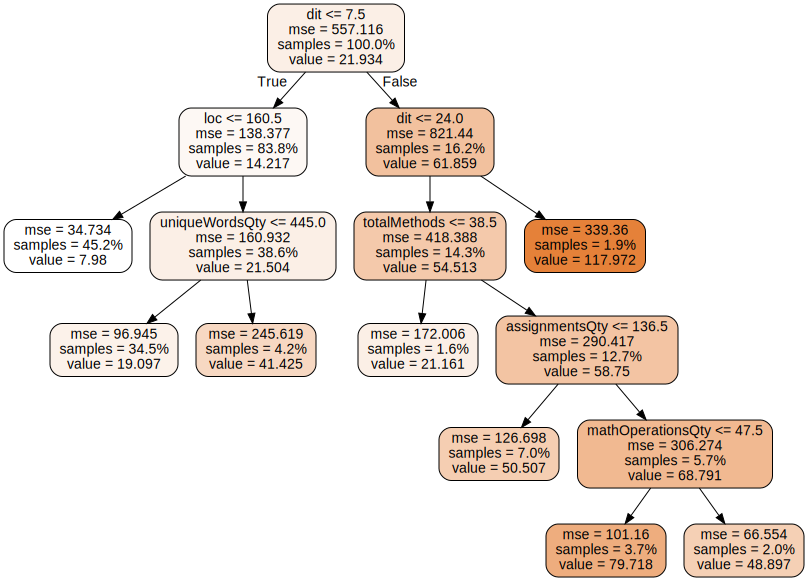

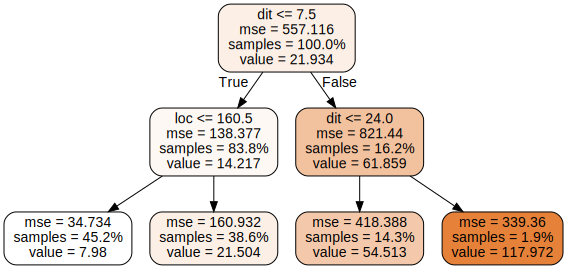

In [35]:
from sklearn.tree import DecisionTreeRegressor
modelInstanceR = DecisionTreeRegressor(max_leaf_nodes=8)
modelInstanceRsimpler = DecisionTreeRegressor(max_leaf_nodes=4)
alteredData4 = metricsDataMaven['data'].drop(['rfc'],axis=1)
nlineModelR = toolkit.refinement.makeAndUpdateModel(rootDirectory, alteredData4, 5, 'cbo', modelInstanceR, modelInstanceRsimpler, visualize=True, scoreOnly=False)

### The second most important feature for predicting coupling between objects appears to be the total number of variables in a class.

### This model will predict the LCOM (Lack of Cohesion of Methods)

In [36]:
from sklearn.tree import DecisionTreeRegressor
modelInstanceR = DecisionTreeRegressor(max_leaf_nodes=16)
modelInstanceRsimpler = DecisionTreeRegressor(max_leaf_nodes=16)
alteredData4 = metricsDataMaven['data']
nlineModelR = toolkit.refinement.makeAndUpdateModel(rootDirectory, alteredData4, 2, 'lcom', modelInstanceR, modelInstanceRsimpler, visualize=False, scoreOnly=False)

Response variable was lcom
Model.score: 0.591688
             name  importance
14  publicMethods    0.564282
24  privateFields    0.196105
Model.score: 0.503353
            name  importance
1   totalMethods    0.566056
3  privateFields    0.196299


### We see that the most important feature for predicting lack of cohesion of methods (LCOM) is the total number of methods in a class. This will inflate the LCOM score as the number of methods and LCOM are related 

### What happens if we drop 'publicMethods' and 'totalMethods' from our dataframe?

In [37]:
from sklearn.tree import DecisionTreeRegressor
modelInstanceR = DecisionTreeRegressor(max_leaf_nodes=16)
modelInstanceRsimpler = DecisionTreeRegressor(max_leaf_nodes=8)
alteredData4 = metricsDataMaven['data'].drop(['publicMethods','totalMethods'],axis=1)
nlineModelR = toolkit.refinement.makeAndUpdateModel(rootDirectory, alteredData4, 2, 'lcom', modelInstanceR, modelInstanceRsimpler, visualize=False, scoreOnly=False)

Response variable was lcom
Model.score: 0.524512
                 name  importance
34  stringLiteralsQty    0.562074
22      privateFields    0.199536
Model.score: 0.540454
                name  importance
5  stringLiteralsQty    0.570270
4        tryCatchQty    0.209891
1      privateFields    0.202686


Looks like the model somewhat worse. It is interesting that the number of string literals is the discriminating factor 

### This model predicts the size of files in terms of lines of code (loc)

Response variable was loc
Model.score: 0.868295
              name  importance
38  assignmentsQty    0.838719
Model.score: 0.833318
             name  importance
4  assignmentsQty    0.903564


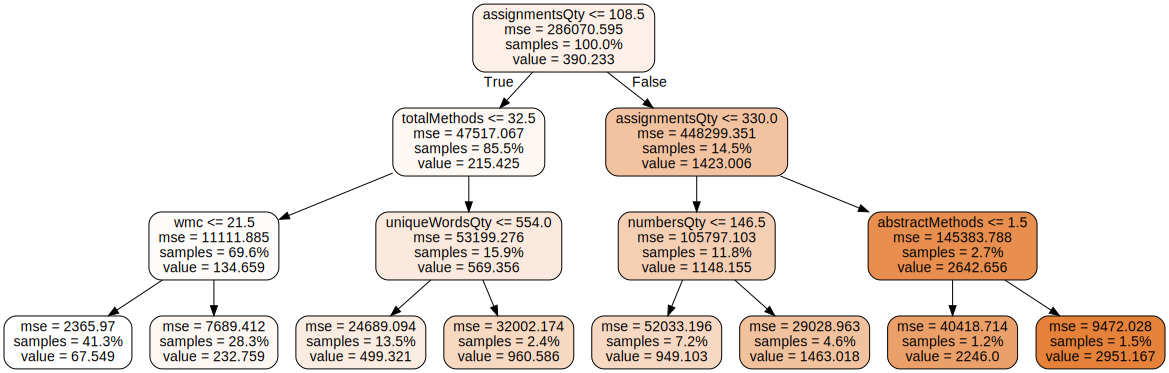

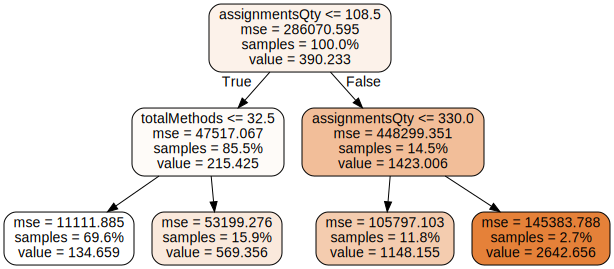

In [38]:
from sklearn.tree import DecisionTreeRegressor
modelInstanceR = DecisionTreeRegressor(max_leaf_nodes=8)
modelInstanceRsimpler = DecisionTreeRegressor(max_leaf_nodes=4)
alteredData4 = metricsDataMaven['data']
nlineModelR = toolkit.refinement.makeAndUpdateModel(rootDirectory, alteredData4, 2, 'loc', modelInstanceR, modelInstanceRsimpler, visualize=True, scoreOnly=False)

In [29]:
from sklearn.tree import DecisionTreeRegressor
modelInstanceR = DecisionTreeRegressor(max_leaf_nodes=8)
modelInstanceRsimpler = DecisionTreeRegressor(max_leaf_nodes=4)
alteredData4 = metricsDataMaven['data']
nlineModelR = toolkit.refinement.makeAndUpdateModel(rootDirectory, alteredData4, 2, 'loc', modelInstanceR, modelInstanceRsimpler, visualize=False, scoreOnly=False)

Response variable was loc
Model.score: 0.866080
              name  importance
38  assignmentsQty    0.838719
Model.score: 0.833318
             name  importance
3  assignmentsQty    0.903564


### The most important feature for predicting size of a file by lines of code is the total number of assignments.

### This model predicts the WMC (Weight Method Class) or McCabe's complexity. 

Response variable was wmc
Model.score: 0.896149
   name  importance
30  loc    0.776272
Model.score: 0.923322
   name  importance
30  loc    0.924661
Model.score: 0.928631
  name  importance
2  loc    0.949269
Model.score: 0.884710
  name  importance
2  loc     0.94952


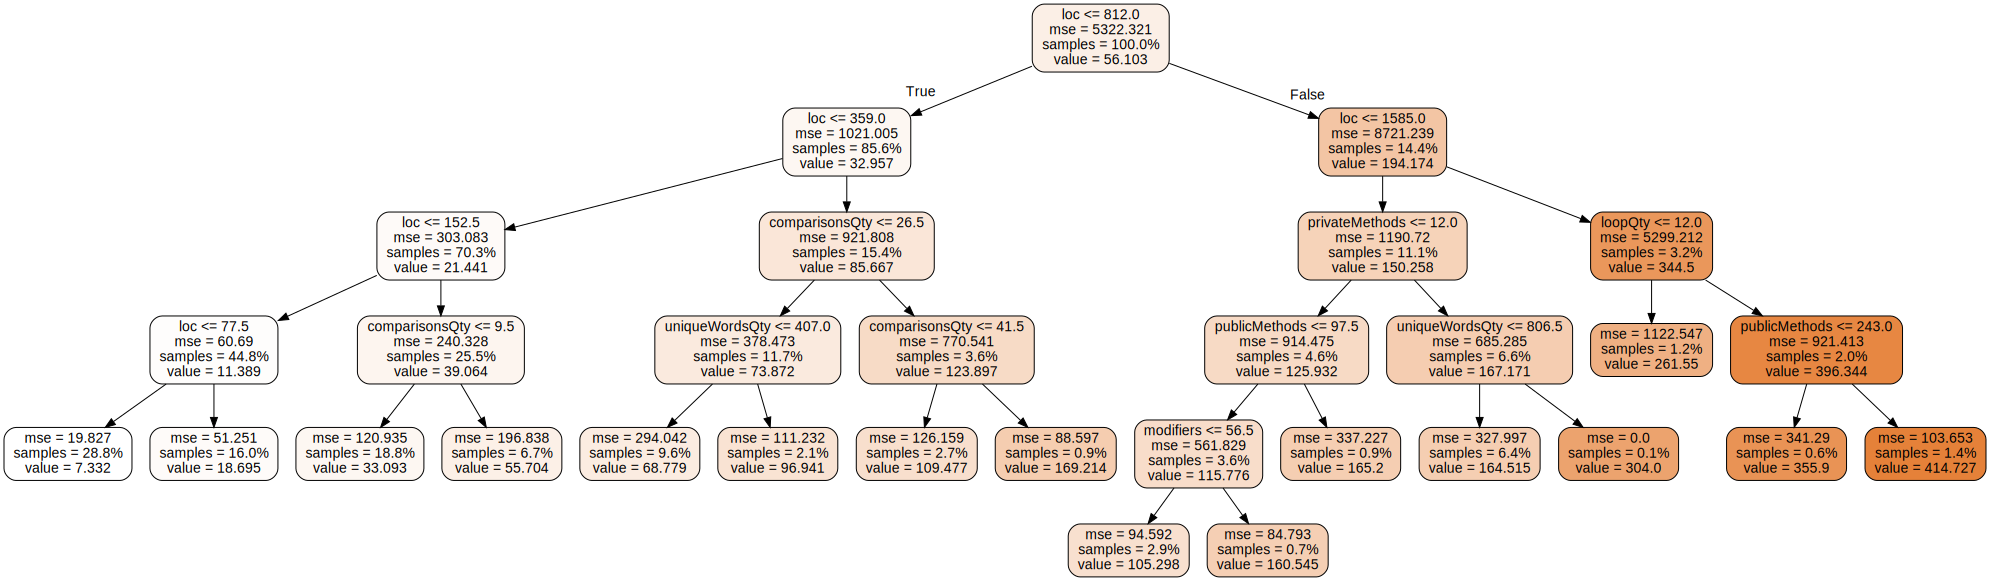

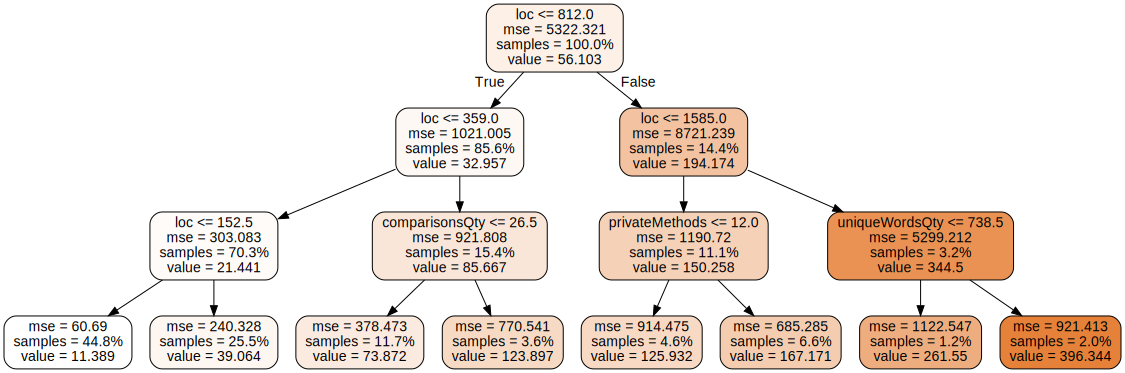

In [39]:
from sklearn.tree import DecisionTreeRegressor
modelInstanceR = DecisionTreeRegressor(max_leaf_nodes=16)
modelInstanceRsimpler = DecisionTreeRegressor(max_leaf_nodes=8)
alteredData4 = metricsDataMaven['data']
nlineModelR = toolkit.refinement.makeAndUpdateModel(rootDirectory, alteredData4, 3, 'wmc', modelInstanceR, modelInstanceRsimpler, visualize=True, scoreOnly=False)

### We can see there is somewhat of a correlation between WMC and the total number of lines. 

In [21]:
# We use the Spearman measure of rank correlation
metricsDataMaven['data']['loc'].corr(metricsDataMaven['data']['wmc'], method='spearman')

/opt/conda/envs/python2/lib/python2.7/site-packages/scipy/stats/stats.py:253: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


0.14600716116236334

### In this case study, we have used the toolkit to do the following:
- Gather the okhttp dataset
- Create regression models of net churn
- Create regression models to analyze coupling between objects, lack of cohesion of methods, and weighted method class.